<a href="https://colab.research.google.com/github/ish02K/Beta/blob/main/ANN_practice_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.0.0
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
X=pd.DataFrame(cancer.data,columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = pd.DataFrame(cancer.target,columns=['target'])
y['target'].unique()

array([0, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X),columns = X.columns)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20, stratify = y)
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((455, 30), (455, 1), (114, 30), (114, 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()
model.add(Dense(50,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1550      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

In [ ]:
history=model.fit(X_train,y_train,batch_size=5,epochs=50,validation_split=0.1)

Epoch 1/50
82/82 [==============================] - 0s 4ms/step - loss: 0.0839 - accuracy: 0.9829 - val_loss: 0.0603 - val_accuracy: 0.9783
Epoch 2/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0550 - val_accuracy: 0.9783
Epoch 3/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9829 - val_loss: 0.0398 - val_accuracy: 0.9783
Epoch 4/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9853 - val_loss: 0.0572 - val_accuracy: 0.9783
Epoch 5/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9853 - val_loss: 0.0652 - val_accuracy: 0.9783
Epoch 6/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9853 - val_loss: 0.0580 - val_accuracy: 0.9783
Epoch 7/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9902 - val_loss: 0.0596 - val_accuracy: 0.9783
Epoch 8/50
82/82 [==

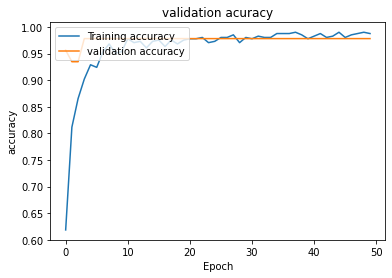

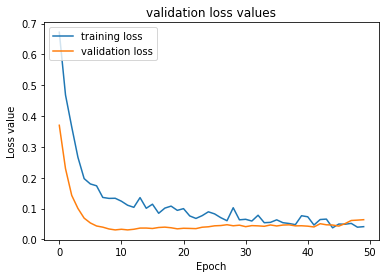

In [ ]:
 plt.plot(history.history['accuracy'], label='Training accuracy')
 plt.plot(history.history['val_accuracy'], label='validation accuracy')
 plt.title('validation acuracy')
 plt.ylabel('accuracy')
 plt.xlabel('Epoch')
 plt.legend(loc='upper left')
 plt.show()

 plt.plot(history.history['loss'], label='training loss')
 plt.plot(history.history['val_loss'], label='validation loss')
 plt.title('validation loss values')
 plt.ylabel('Loss value')
 plt.xlabel('Epoch')
 plt.legend(loc="upper left")
 plt.show()

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9912


[0.02427120879292488, 0.9912280440330505]

In [ ]:
y_pred=model.predict(X_test.values)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.007346490215242099